# Salifort Motors HR predictive model 

# We are conducting the**PACE** strategy in building a machine learning model , which classify the whole project to 4 stages :
  - ### Plan
  - ### Analyze
  - ### Construct
  - ### Execute

## **Pace: Plan**

###  The business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

our goal in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict ***employees likely to quit***, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Getting Familiar  with the HR dataset

The dataset that we'll be using contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

### Import packages

In [514]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
from sklearn.metrics  import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import precision_score  , recall_score , accuracy_score, f1_score
from sklearn.model_selection import train_test_split , GridSearchCV ,  PredefinedSplit

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [515]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

### basic information about the data

In [529]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### descriptive statistics about the data

In [517]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [518]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [519]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'Department': 'department'})
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [520]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [521]:
# Check for duplicates
df0.duplicated().sum()

3008

In [522]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

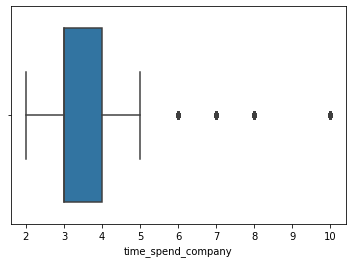

In [523]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = "time_spend_company" , data = df1)

In [524]:
# Determine the number of rows containing outliers
Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with at least one outlier
outliers = ((df1['time_spend_company'] < lower_bound) | (df1['time_spend_company'] > upper_bound))

outliers.sum()

824

In [525]:
#Dropping outliers in time_spend_company column
df2 = df1[~outliers]

In [526]:
df2.shape

(11167, 10)

# pAce: Analyze Stage

### Check class balance

understanding how many employees left and how many stayed(Checking class balance)

In [527]:
# Get numbers of people who left vs. stayed
df2['left'].value_counts()
# Get percentages of people who left vs. stayed
df2['left'].value_counts(normalize = True) *100

0    83.146772
1    16.853228
Name: left, dtype: float64

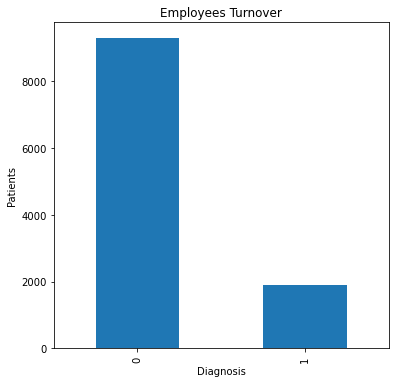

In [528]:
#visualizing class balance
employee_turnover = df2['left'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
employee_turnover.plot.bar(ax = ax) 
ax.set_title('Employees Turnover') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()

The target variable is quite imbalanced , but it's ok we will proceed without performing upsampling , since the majority didn't yet reach 90%

#### let's now encode our categorical variables

In [509]:
# Encode the `salary` column as an ordinal numeric category
df2['salary'] = (
    df2['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df2= pd.get_dummies(df1, drop_first=False)

# Display the new dataframe
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


one of Logistic regression assumptions is no extreme multicollinearity between independent variables , so let's create a heat map to check this

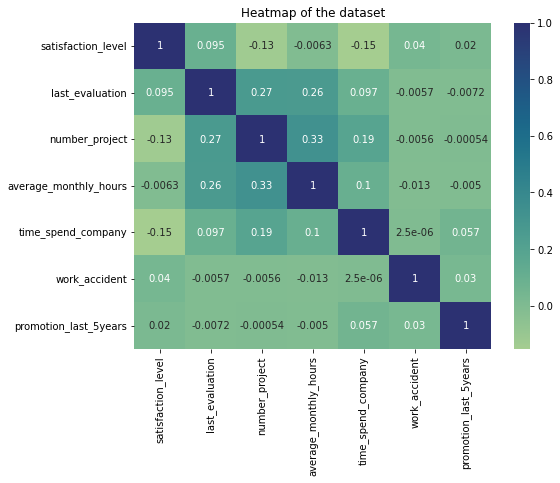

In [510]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df2[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", 
                    "time_spend_company", "work_accident", "promotion_last_5years"]]
    .corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

ok , no extreme multicollinearity exists

# paCe: Construct Stage

## Step 3. Model Building

This is a classification task , since our target variable is categorical consisting of 0 and 1. 

we will proceed with five classifiers:
 - LogisticRgression
 - Naive Bayes
 - Decision Tree
 - Random Forest
 - XGBOOST

### Modeling

## Experiment 1 : Logistic regression

In [511]:
#Training a Logistic regression
# Identifying features and target variable
X = df2.drop(['left'] , axis = 1)
y = df2['left']

In [512]:
# Split dataset into training , validating holdout(test) datasets

#creating Training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , stratify=y , random_state = 42)

#creating a validation set
X_tr , X_val , y_tr , y_val = train_test_split(X_train, y_train , test_size = 0.5,  stratify=y_train , random_state = 10)

Let's illustrate what we are doing here , simply we are splitting our dataset to training and testing set as normal , but we want to apply the **cross validation** technique , which means that we will train our model using the training data as normal , but we won't check the model accuracy on the test data , instead we will use our validation set to train all the models we are going to experiment.
now the question is what should be done with the test data 🤔 ????!
the test data will remain unseen until we finish building all the models , finally the champion model (the model with higher accuracy scores) will only be used to predict on the testing data 😎.
the following diagram illustrates the idea. 

Note: it's not a must to split the data 60 20 20 , in our case here , we are splitting it to 70 15 15



In [530]:
#fitting training data into the model and building the model
log_model = LogisticRegression(max_iter=800).fit(X_train, y_train)

#### We are going to use the confusion matrix & accuracy measures to test the accuracy of each model we will create , so let's create a function that takes three arguments , model , x_data and y_data , to prevent code duplication

In [531]:
#creating a confusion matrix to identify how accurate our classifier is
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data) # Save predictions
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_) # Calculate the values for each quadrant in the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` this is written to prevent the numbers in the confusion matrix to appear in that form (1.5e+03) 
    plt.show()    
    
    #Accuracy reports
    report =    {"Accuracy" :accuracy_score(y_data, model_pred) , 
                "Precision": precision_score(y_data, model_pred),
                "Recall" : recall_score(y_data, model_pred) , 
                "F1 Score" : f1_score(y_data, model_pred)}
    for key , value  in report.items():
        print(f"{key}:{value.round(3)}")

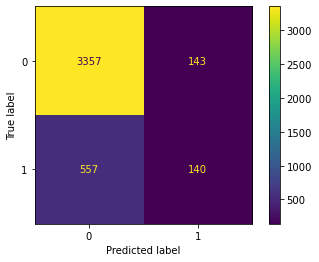

Accuracy:0.833
Precision:0.495
Recall:0.201
F1 Score:0.286


In [532]:
conf_matrix_plot(log_model, X_val, y_val)

Now which of these accuracy measures should we care about ? it depends on what we want the model to achieve.

**Accuracy** is a straight forward metric , but it may not be the most suitable metric in scenarios with imbalanced datasets , like the one we have her

**Precision** is useful when the cost of **false positives** is high.

**Recall** is useful when the cost of **false negatives** is high.

**f1-score**  is useful when there is an uneven class distribution or when there is an equal emphasis on both false positives and false negatives.

so we care about both **false positive** & **false negative** this is because:
 - **False positive** means that the model incorrectly identified some emplyee as churn while they are not , this may cost the company a lot of money and time on training and searching for and recruiting other employees.
 
 - on the other hand ,  **False negative** is a disaster which means that the model incorrectly identified employees as not churn while they are.
 
since we care about both , so the best metric to be used her to evaluate each model we will use , is **F1-score**

## Experiment 2: Naive Bayes

There different types of Naive bayes algorithms to be used here , they are :

**BernoulliNB**: Used for binary/Boolean features 

**CategoricalNB**: Used for categorical features

**ComplementNB**: Used for imbalanced datasets, often for text classification tasks

**GaussianNB**: Used for continuous features, normally distributed features

**MultinomialNB**: Used for multinomial (discrete) features

we previously observed that our dataset is imbalanced , but we decided to proceed with it without resampling , from the above naive base classifiers , ComplementNB will be appropriate in this situation

In [533]:
# Training a Naive Bayes Classifier
Naive_model = ComplementNB().fit(X_train , y_train)

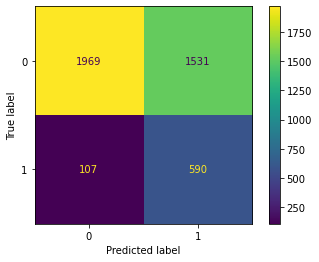

Accuracy:0.61
Precision:0.278
Recall:0.846
F1 Score:0.419


In [534]:
conf_matrix_plot(Naive_model, X_val, y_val)

## Experiment 3 : Decision Tree

#### We should first first identify the best Hyper paramaters for the classifier using GridSearch

In [535]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier()

In [536]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6]}

In [537]:
# Assign a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

GridSearchCV wants to cross validate the data. In fact, if the CV parameter was left blank, it would split the data into five folds for cross-validation by default. Because we are using a separate validation set, it's important to explicitly tell the function how to perform the validation. This includes telling it every row in the training and testing sets. we will use a **list comprehension** to generate a list of the same length as our X_tr data, where each value is either a negative one or a zero. Use this list to indicate to GridSearchCV that each row labeled negative 1 is in the training set and each row labeled as zero is in the validation set.

In [538]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [539]:
# to determine the time taken by GridSearch to execute
%time 

# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=custom_split, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.87 µs


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
           

In [540]:
#getting the best paramaters to be used with Random forest
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

#### ok that's great , after tuning the hyperparamters  , let's fit the decision tree classifier time using the hyperparamters that's provided by the GridSearch

In [541]:
#Training Decison tree model with the best hyperparamters
tree_model = DecisionTreeClassifier(max_depth= 6, min_samples_leaf=  2 , min_samples_split= 2).fit(X_train , y_train)

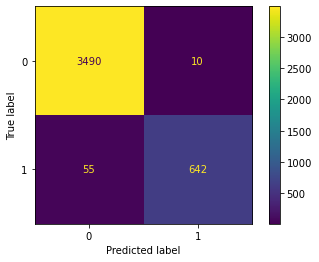

Accuracy:0.985
Precision:0.985
Recall:0.921
F1 Score:0.952


In [542]:
conf_matrix_plot(tree_model, X_val, y_val)

Amazing 😎 , according to the confusion matrix , **false positives**  and **false negatives** are decreasing , also the f1 score increased to .952 , which means that we are achieving what we want 👌💪 , let's continue experimenting with other algorithms , may be others could produce better results 🤔

## Experiment 4 : Random Forest

#### In this experiment , let's use a tree-based ensemble model  , Random forest  , and see how it will score

In [543]:
# Instantiate random forest model.
rf = RandomForestClassifier()

In [544]:
# Determine set of hyperparameters for random forest
rf_cv_params = {'n_estimators' : [50,100 , 150 , 200], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [545]:
%time 
rf_val = GridSearchCV(rf, rf_cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train , y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Fitting 1 folds for each of 1680 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  5.1min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight...
                                              random_state=None, verbose=0,
                                              warm_start=False),

In [546]:
#getting the best paramaters to be used with Random forest
rf_val.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [547]:
rf_model = RandomForestClassifier(max_depth = 12 , max_features =  'sqrt' , 
                                  max_samples = 0.9, min_samples_leaf = 2, min_samples_split = 2 , n_estimators =  50 ).fit(X_train , y_train)

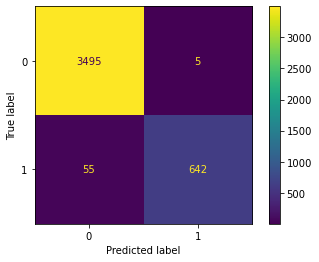

Accuracy:0.986
Precision:0.992
Recall:0.921
F1 Score:0.955


In [548]:
conf_matrix_plot(rf_model, X_val, y_val)

Great , f1 score increased , **False positives decreased** , the overall model accuracy is increasing , which is great 💪

## Experiment 5: Gradient boosting (XGBOOST)

#### In this experiment , let's use another tree-based ensemble model  ,  XGBOOST  

In [549]:
#Instantiate XGBOOST classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [550]:
# Determine set of hyperparameters for XGBOOST
xgb_cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [551]:
%%time
xgb_cv = GridSearchCV(xgb,
                      xgb_cv_params,
                      scoring = scoring,
                      cv = custom_split,
                      refit = 'f1'
                     )

# Fit the model
xgb_cv.fit(X_train, y_train)

CPU times: user 4.7 s, sys: 0 ns, total: 4.7 s
Wall time: 2.54 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],

In [552]:
#getting the best paramaters to be used with XGBOOST
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 10,
 'subsample': 0.7}

In [553]:
#Training XGBOOST model with the best hyperparamters
xg_model = XGBClassifier(colsample_bytree =  0.7,
 learning_rate= 0.1,
 max_depth=  6,
 min_child_weight =  3,
 n_estimators = 10,
 subsample = 0.7).fit(X_train , y_train)

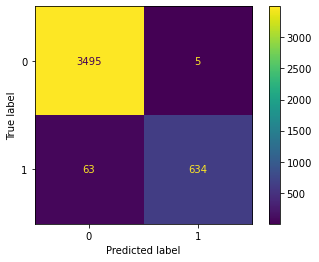

Accuracy:0.984
Precision:0.992
Recall:0.91
F1 Score:0.949


In [554]:
conf_matrix_plot(xg_model, X_val, y_val)

Hmm 🤔, **F1 score** decreased again , but no problem , comparing all the models will reveal which model is the champion model.

# PACE: Execute Stage

## Step 4. Results and Evaluation

### Summary of model results

#### let's Compare all the alogtithms used together to identify the Champion model

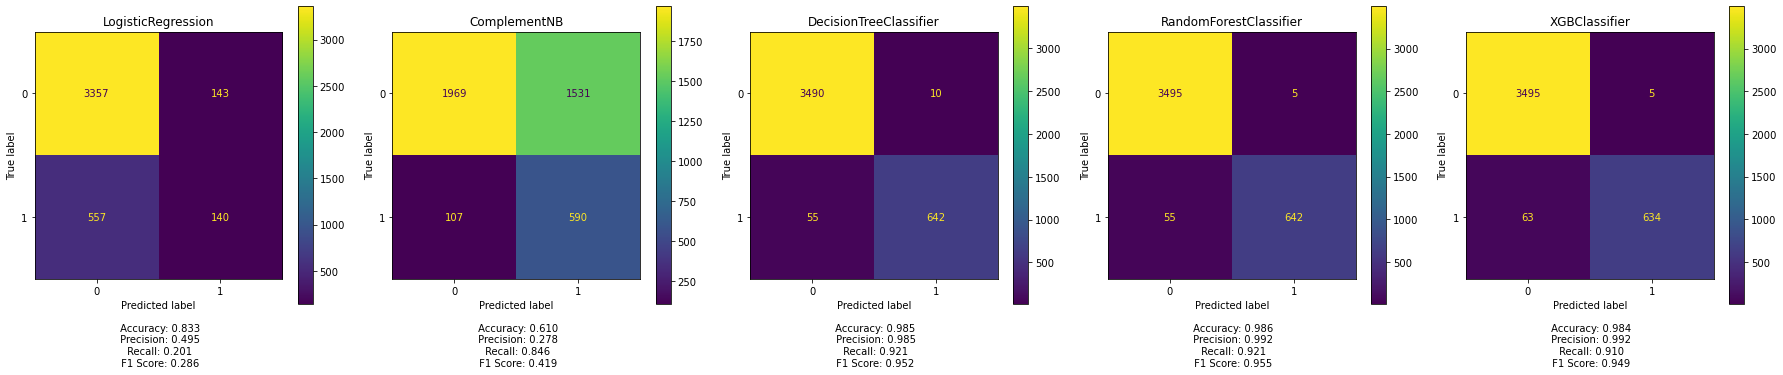

In [555]:
# Collecting our classifiers in a list
classifiers = [log_model, Naive_model, tree_model, rf_model, xg_model]

# Create a grid of subplots to compare the confusion matrices and accuracy measures
num_classifiers = len(classifiers)

fig, axes = plt.subplots(1, num_classifiers, figsize=(5 * num_classifiers, 5))

# Iterate over each classifier and display its confusion matrix along with its accuracy measures
for i, model in enumerate(classifiers):
    # Compute the confusion matrix
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], values_format='')
    axes[i].set_title(model.__class__.__name__)  # Set the title to the classifier name
    
    # Compute accuracy measures
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Add text annotations for accuracy measures
    textstr = f' \n \n \n \n \n Accuracy: {acc:.3f}\n Precision: {prec:.3f}\n Recall: {rec:.3f}\n F1 Score: {f1:.3f}'
    axes[i].text(0.5, -0.15, textstr, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


# By comparing the results of the five classifiers used , the champion model with F1-Score 0.955 ,  is **RandomForest** 🏆🥇

Finally , let's look at the random forest feature importance to identify which features were the most useful for the champion model (random forest)

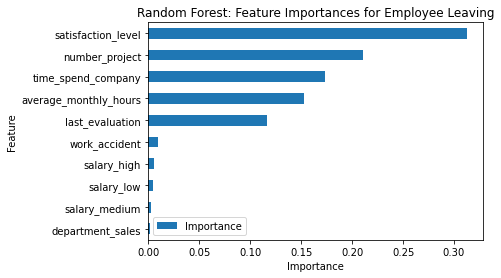

In [559]:
# Get feature importances
feat_impt = rf_val.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_val.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**satisfaction_level** , **number_project** , **time_spend_company** , **average_monthly_hours** , **last_evaluation** are the most effective features for random forest classifier

Now let's evaluate the champion model on the unseen test set

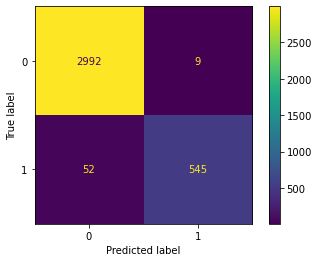

Accuracy:0.983
Precision:0.984
Recall:0.913
F1 Score:0.947


In [556]:
conf_matrix_plot(rf_model, X_test, y_test)

Great F1-score !! ♥️

### Conclusion, Recommendations

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 